
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W10/W10P3.ipynb)


In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import scipy

In [ ]:
def to_dataframe(text: str):
    """
    
    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch4data.zip
  !unzip "/content/ch4data.zip" -d "/content/ch4data/"
  if not os.getcwd() == '/content/ch4data':
    os.chdir("ch4data")
  else:
    print(f"Current directory is now {os.getcwd()}")
download_data()

--2022-12-09 06:48:55--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch4data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216825 (212K) [application/x-zip-compressed]
Saving to: ‘ch4data.zip’

ch4data.zip         100%[===================>] 211.74K   435KB/s    in 0.5s    

2022-12-09 06:48:56 (435 KB/s) - ‘ch4data.zip’ saved [216825/216825]

Archive:  /content/ch4data.zip
  inflating: /content/ch4data/d-pg-0111.txt  
  inflating: /content/ch4data/d-sp58010.txt  
  inflating: /content/ch4data/d-spy-0111.txt  
  inflating: /content/ch4data/d-useu9910.txt  
  inflating: /content/ch4data/m-ibmsp6709.txt  
  inflating: /content/ch4data/m-intcsp7309.txt  
  inflating: /content/ch4data/m-ko-6111.txt  
  inflating: /content/ch4data/m-sp56710.txt  


In [ ]:
data_ = to_dataframe("m-intcsp7309.txt")
data_

,date,intc,sp
0,19730131,0.010050,-0.017111
1,19730228,-0.139303,-0.037490
2,19730330,0.069364,-0.001433
3,19730430,0.086486,-0.040800
4,19730531,-0.104478,-0.018884
...,...,...,...
439,20090831,0.062857,0.033560
440,20090930,-0.036909,0.035723
441,20091030,-0.023505,-0.019762
442,20091130,0.012036,0.057364


In [ ]:
data= data_["intc"]

In [ ]:
log_1 = lambda x: np.log(x+1)

In [ ]:
data = data.apply(log_1)

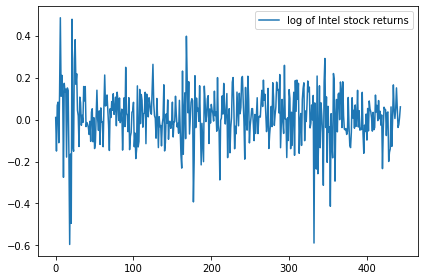

In [ ]:
plt.plot(data, label = "log of Intel stock returns")
plt.legend()
plt.tight_layout()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
mod = ARIMA(data, order = (0,0,0))  ### we fit the mean equation
model = mod.fit()

In [ ]:
at = model.resid

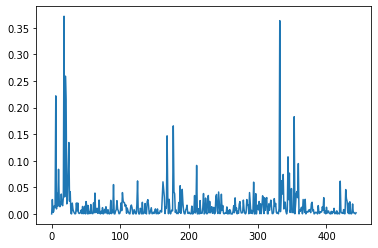

In [ ]:
plt.plot(np.square(at))

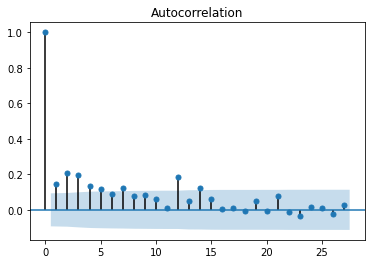

In [ ]:
plot_acf(np.square(at));

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(np.square(at), return_df = True, lags = 12) ### there is serieal correlation of the residuals therefore an ARCH effect is present.

,lb_stat,lb_pvalue
1,9.413683,2.153722e-03
2,28.710337,5.829477e-07
3,45.887155,5.993622e-10
4,53.790775,5.821221e-11
5,59.840537,1.311263e-11
6,63.321386,9.492126e-12
7,69.906859,1.542866e-12
8,72.510162,1.552309e-12
9,75.676726,1.161629e-12
10,77.310472,1.686344e-12


[See here](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_arch.html)  for Engel's Het test. 

In [ ]:
statsmodels.stats.diagnostic.het_arch(at, nlags = 12) ####There is a strong ARCH effect here!

(53.90124090435578,
 2.845897921453057e-07,
 4.977672145972329,
 9.739345398055665e-08)

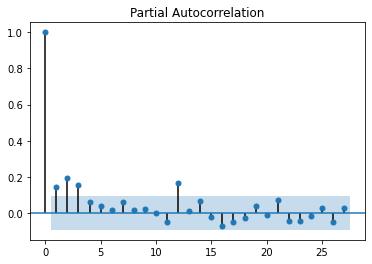

In [ ]:
plot_pacf(np.square(at));

In [ ]:
!pip install arch
import arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 5.4 MB/s 


In [ ]:
mod = arch.arch_model(data, q = 1, vol = "ARCH")  ### Fitting an ARCH(1) model here!
model = mod.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6365.149087989967
Iteration:      2,   Func. Count:     14,   Neg. LLF: 44.159460390905735
Iteration:      3,   Func. Count:     21,   Neg. LLF: -281.25474865320325
Iteration:      4,   Func. Count:     26,   Neg. LLF: -299.6935046289766
Iteration:      5,   Func. Count:     30,   Neg. LLF: -299.6935113262524
Iteration:      6,   Func. Count:     33,   Neg. LLF: -299.69351132621836
Optimization terminated successfully    (Exit mode 0)
            Current function value: -299.6935113262524
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01607. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   intc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                299.694
Distribution:                  Normal   AIC:                          -593.387
Method:            Maximum Likelihood   BIC:                          -581.100
                                        No. Observations:                  444
Date:                Fri, Dec 09 2022   Df Residuals:                      443
Time:                        06:49:15   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0131  5.754e-03      2.283  2.245e-02 [1.857e-03,2.441e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0111  1.507e-03      7.357  1.885e-13 [8.135e-03,1.404e-02]
alpha[1]       0.3700      0.168      2.197  2.799e-02   [3.999e-02,  0.700]
============================================================================

Covariance estimator: robust
"""

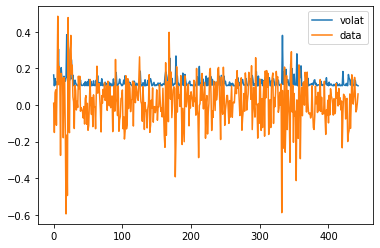

In [ ]:
plt.plot(model.conditional_volatility, label = "volat")
plt.plot(data, label = "data")
plt.plot()
plt.legend()
plt.show()

In [ ]:
model.tvalues

mu          2.282653
omega       7.356689
alpha[1]    2.197438
Name: tvalues, dtype: float64

In [ ]:
mod = arch.arch_model(data, q = 1, vol = "ARCH", dist = "gaussian")
model = mod.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6365.149087989967
Iteration:      2,   Func. Count:     14,   Neg. LLF: 44.159460390905735
Iteration:      3,   Func. Count:     21,   Neg. LLF: -281.25474865320325
Iteration:      4,   Func. Count:     26,   Neg. LLF: -299.6935046289766
Iteration:      5,   Func. Count:     30,   Neg. LLF: -299.6935113262524
Iteration:      6,   Func. Count:     33,   Neg. LLF: -299.69351132621836
Optimization terminated successfully    (Exit mode 0)
            Current function value: -299.6935113262524
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01607. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   intc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                299.694
Distribution:                  Normal   AIC:                          -593.387
Method:            Maximum Likelihood   BIC:                          -581.100
                                        No. Observations:                  444
Date:                Fri, Dec 09 2022   Df Residuals:                      443
Time:                        07:33:13   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0131  5.754e-03      2.283  2.245e-02 [1.857e-03,2.441e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0111  1.507e-03      7.357  1.885e-13 [8.135e-03,1.404e-02]
alpha[1]       0.3700      0.168      2.197  2.799e-02   [3.999e-02,  0.700]
============================================================================

Covariance estimator: robust
"""

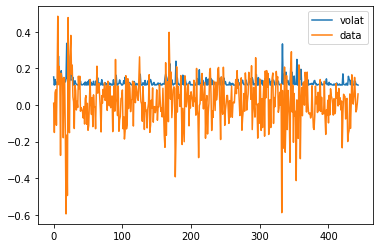

In [ ]:
plt.plot(model.conditional_volatility, label = "volat")
plt.plot(data, label = "data")
plt.legend()
plt.show()

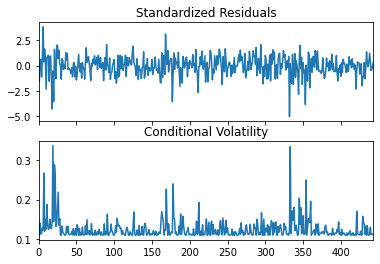

In [ ]:
model.plot();

In [ ]:
model.forecast(reindex=False, horizon = 20).residual_variance ### longterm forecast ---

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20
443,0.012382,0.015238,0.016015,0.016226,0.016284,0.0163,0.016304,0.016305,0.016305,0.016305,0.016305,0.016305,0.016305,0.016305,0.016305,0.016305,0.016305,0.016305,0.016305,0.016305


In [ ]:
ress = model.resid/model.conditional_volatility
ress_ = att/model.conditional_volatility
plt.plot(ress, label = "Model Checking")
plt.plot(att, label = "Model Checking")
plt.legend()
plt.show()

NameError: ignored

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(ress, return_df = True)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.066146,0.797033
2,0.693941,0.706826
3,4.234483,0.237232
4,5.634314,0.228173
5,6.001725,0.306051
6,6.169838,0.404436
7,9.320301,0.230470
8,11.939934,0.153904
9,12.008587,0.212826
10,12.158323,0.274600
